In [1]:
import numpy as np

## Assuming:
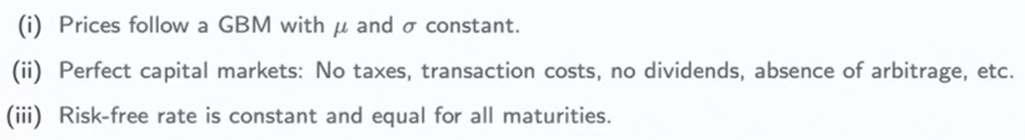

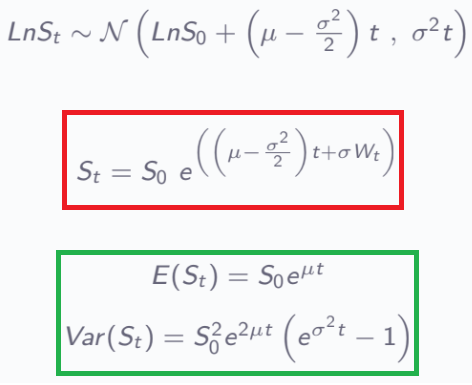

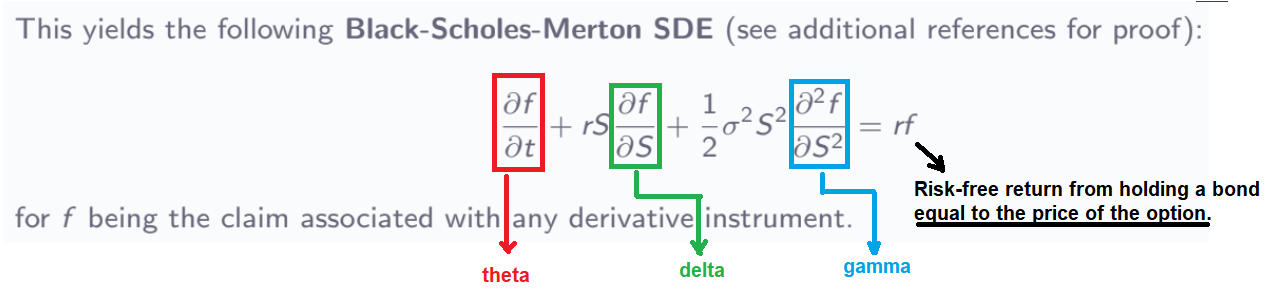

$f:$ Price of the option

$r:$ Risk-free rate

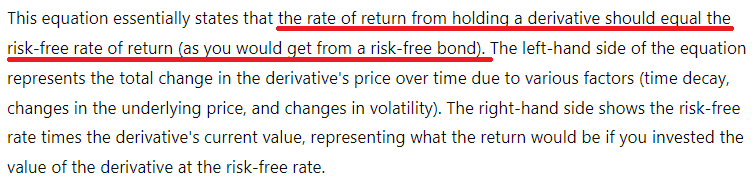

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm, norm

# Write a Black-Scholes pricer function
def BS(S0, r, sigma, t, T, K, call_or_put="C"):
    dt = T - t
    d1 = (np.log(S0/K) + (r + 1/2*sigma**2)*dt) / (sigma*np.sqrt(dt))
    d2 = (np.log(S0/K) + (r - 1/2*sigma**2)*dt) / (sigma*np.sqrt(dt))
    if call_or_put == "C":  # if call
        return S0 * norm.cdf(d1) - np.exp(-r*dt) * K * norm.cdf(d2)
    else:  # if put
        return np.exp(-r*dt) * K * norm.cdf(-d2) - S0 * norm.cdf(-d1)

In [3]:
S0 = 100
r = 0
sigma = 0.2
t = 0
T = 2
K = 105

BS(S0, r, sigma, t, T, K, "C")

9.197350649294513

# Greeks

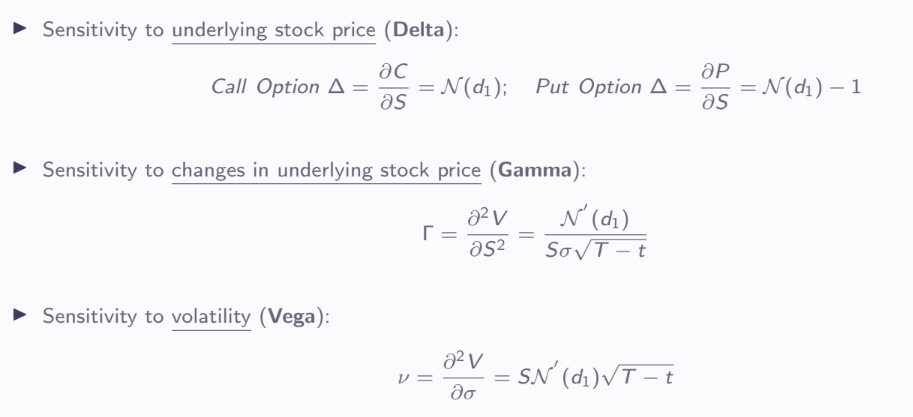

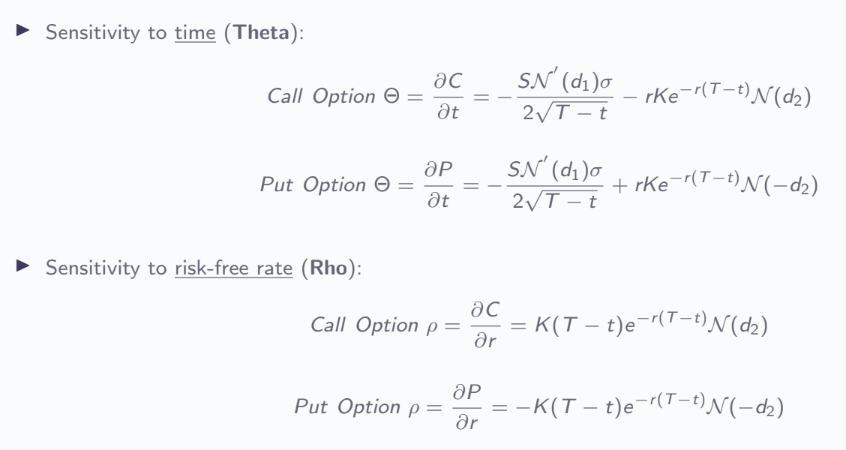

# Black-Scholes model in Python
import numpy as np
import scipy.stats as ss

# Data for input in Black-Scholes formula:

T = 2.0  # supposed in years. It is not the maturity, but the time to maturity
S = 100.0
K = 105.0
r = 0
vol = 0.20  # supposing it is annual
option_type = "C"  # for the put insert 'P'
# dividend yield assumed to be 0

# Compute d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("Option price = {}".format(Opt_Price))
print("Delta = {}".format(Delta))
print("Gamma = {}".format(Gamma))
print("Vega = {}".format(Vega))
print("Theta = {}".format(Theta))
print("Rho = {}".format(Rho))

__________

# Interest Rate Models

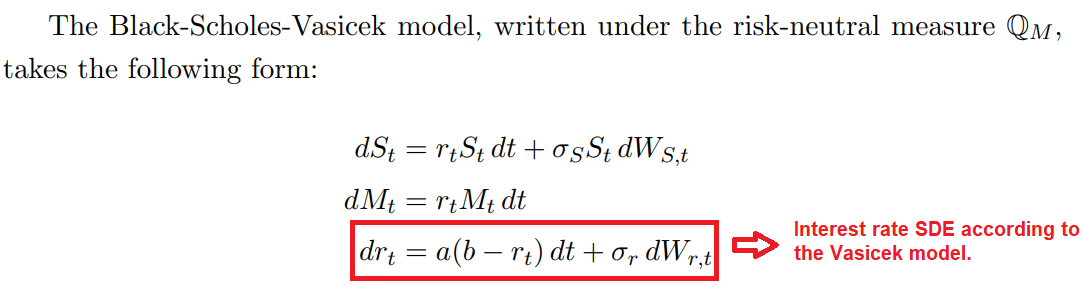

# Black-Scholes Monte Carlo

In [5]:
r = 0.06
sigma = 0.3
T = 1.0
S0 = 100

N = 10000  # number of different iterations / paths
M = 100  # number of steps

dt = T / M

S = np.zeros((M+1, M))
S[0] = S0  # at t=0, all prices are S0. (first row is S0 repeated.)
rn = np.random.standard_normal((M, M))
multipliers = np.exp((r - sigma**2 / 2) * dt + sigma * np.sqrt(dt) * rn)
print("multipliers.shape =", multipliers.shape)
multipliers.cumprod(axis=0)

multipliers.shape = (100, 100)


array([[0.96151031, 0.97918005, 0.97389758, ..., 0.96723707, 0.94527232,
        1.0402525 ],
       [0.99349374, 0.9611619 , 1.04521134, ..., 0.95076824, 0.96440508,
        1.06053518],
       [0.97953182, 1.01562672, 1.00935724, ..., 0.92978794, 0.96588877,
        1.11944574],
       ...,
       [1.09429353, 1.19195222, 0.60974231, ..., 1.29913426, 1.35231117,
        0.8274847 ],
       [1.08091704, 1.18584561, 0.59279581, ..., 1.26947926, 1.3293951 ,
        0.84677286],
       [1.09704635, 1.22026302, 0.58627888, ..., 1.25612396, 1.31837659,
        0.83687594]])

In [6]:
S[1:, :] = S0 * multipliers.cumprod(axis=0)
S

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [ 96.15103064,  97.918005  ,  97.38975821, ...,  96.72370726,
         94.52723208, 104.0252496 ],
       [ 99.349374  ,  96.11618997, 104.52113424, ...,  95.07682414,
         96.4405079 , 106.05351844],
       ...,
       [109.42935282, 119.19522232,  60.97423061, ..., 129.91342624,
        135.231117  ,  82.74846999],
       [108.09170443, 118.5845608 ,  59.27958077, ..., 126.94792557,
        132.93950975,  84.67728647],
       [109.70463485, 122.02630172,  58.62788803, ..., 125.61239637,
        131.83765946,  83.68759437]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


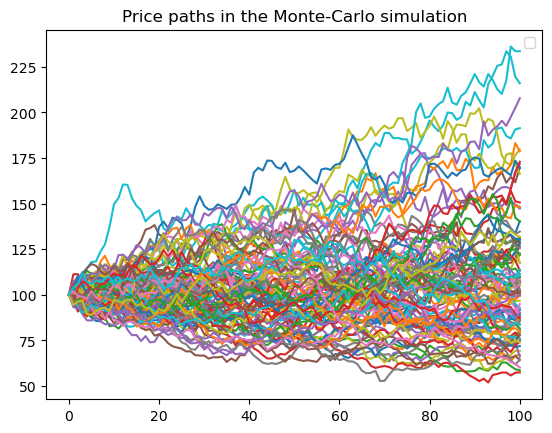

In [7]:
plt.plot(S[:, :100])
plt.title("Price paths in the Monte-Carlo simulation")
plt.legend()

(array([2., 1., 0., 2., 1., 1., 1., 0., 1., 3., 2., 2., 2., 3., 1., 1., 4.,
        2., 4., 4., 2., 1., 1., 2., 4., 5., 0., 4., 4., 2., 2., 2., 1., 0.,
        2., 0., 2., 1., 1., 1., 3., 4., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
        2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2., 1., 1., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 57.52329078,  59.2831227 ,  61.04295463,  62.80278655,
         64.56261847,  66.3224504 ,  68.08228232,  69.84211424,
         71.60194617,  73.36177809,  75.12161001,  76.88144194,
         78.64127386,  80.40110578,  82.1609377 ,  83.92076963,
         85.68060155,  87.44043347,  89.2002654 ,  90.96009732,
         92.71992924,  94.47976117,  96.23959309,  97.99942501,
         99.75925694, 101.51908886, 103.27892078, 105.0387527 ,
        106.79858463, 108.55841655, 110.31824847, 112.0780804 ,
        113.83791232, 115.59774424, 11

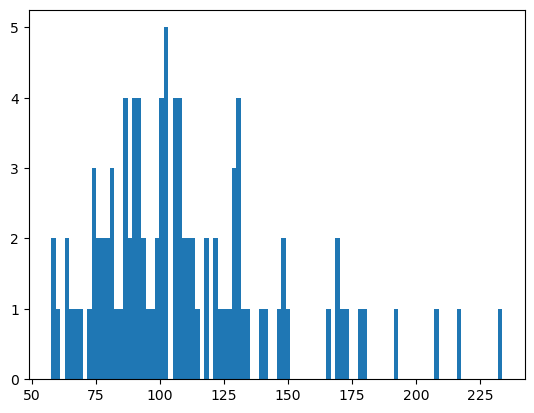

In [8]:
plt.hist(S[-1], bins=100)

In [9]:
np.set_printoptions(precision=4, suppress=True)

def BS_price(S0, K, r, sigma, T, t, call_or_put="C"):
    T = T-t
    d1 = (np.log(S0/K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if call_or_put == "C":
        return S0 * ss.norm.cdf(d1) - np.exp(-r*T) * K * ss.norm.cdf(d2)
    else:
        return np.exp(-r*T) * K * ss.norm.cdf(-d2) - S0 * ss.norm.cdf(-d1)
    
def MC_price(S0, K, r, sigma, T, M, Ite, t, call_or_put="C"):
    
    T = T - t
    dt = T / M
    S = np.zeros((M+1, Ite))
    S[0] = S0  # at t=0, all prices are S0. (first row is S0 repeated.)
    rn = np.random.standard_normal((M, Ite))
    multipliers = np.exp((r - sigma**2 / 2) * dt + sigma * np.sqrt(dt) * rn)
    print("multipliers.cumprod() =\n", multipliers.cumprod(axis=0))
    S[1:, :] = S0 * multipliers.cumprod(axis=0)  # price paths are generated
    print("S =\n", S)
    
    if call_or_put == "C":
        average_payoff = np.maximum(S[-1, :] - K, 0).mean()
    else:
        average_payoff = np.maximum(K - S[-1, :], 0).mean()
    
    opt_price = np.exp(-r*dt) * average_payoff
    return opt_price

In [10]:
BS_price(100, 95, 0.06, 0.3, 1, 0, "C")

17.32356328325764

In [11]:
MC_price(100, 95, 0.06, 0.3, 1, 100, 100000, 0, "C")

multipliers.cumprod() =
 [[0.9943 1.0138 1.0191 ... 1.022  0.9812 0.9957]
 [1.0254 1.0213 0.9992 ... 1.0463 0.9704 0.9761]
 [1.0178 1.018  1.0258 ... 0.9876 0.9455 0.9958]
 ...
 [0.8912 1.0581 0.8494 ... 0.6469 0.6947 1.6164]
 [0.8821 1.0488 0.8449 ... 0.6407 0.6786 1.5522]
 [0.8868 1.0748 0.878  ... 0.6276 0.6972 1.5687]]
S =
 [[100.     100.     100.     ... 100.     100.     100.    ]
 [ 99.4298 101.3802 101.9077 ... 102.2018  98.1196  99.5659]
 [102.5359 102.13    99.9239 ... 104.6262  97.0394  97.6107]
 ...
 [ 89.12   105.8073  84.9441 ...  64.6938  69.4716 161.635 ]
 [ 88.2082 104.8827  84.4864 ...  64.0692  67.8618 155.2155]
 [ 88.6754 107.479   87.8    ...  62.7596  69.7158 156.865 ]]


18.363009853106465

_______________________

# Vasicek Interest Rate Model

Vasicek **mean-reverting risk-neutral** process for interest rates $r_t:$

$dr_t = k (\theta - r_t) dt + \sigma dW_t, \qquad dW_t \sim N(0, \sqrt{dt})$

where,

$k:$ Speed of reversion

$\theta:$ Long-term **mean** of the interest rates

$\sigma:$ Instantenous **volatility** of the interest rates.

$\frac{\sigma^2}{2 k}$ can be defined as the **long term variance** of interest rates

In [12]:
def vasicek(r0, k, theta, sigma, T, N, M):
    """_summary_

    Args:
        r0 (_type_): starting interest rate
        k (_type_): speed of mean-reversion
        theta (_type_): long term average of interest rates
        sigma (_type_): short-term volatility of interest rates
        T (_type_): maturity
        N (_type_): num of steps
        M (_type_): num of paths
    """
    dt = T / N
    rn = np.random.standard_normal((N, M))
    R = np.zeros((N, M))
    R[0, :] = r0  # first row is initial rates
    print("R =\n", R)
    for i in range(N-1):
        # print("R[i, :] =\n", R[i, :])
        dr = k * (theta - R[i, :]) * dt + sigma * np.sqrt(dt) * rn[i, :]
        R[i+1, :] = R[i, :] + dr
    return R

M = 100  # Number of paths for MC
N = 100  # Number of steps
T = 1.0  # Maturity
r0 = 0.01875
k = 0.20
theta = 0.01
sigma = 0.012

rates = vasicek(r0, k, theta, sigma, T, N, M)
rates

R =
 [[0.0187 0.0187 0.0187 ... 0.0187 0.0187 0.0187]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]


array([[ 0.0187,  0.0187,  0.0187, ...,  0.0187,  0.0187,  0.0187],
       [ 0.0173,  0.0186,  0.0191, ...,  0.0181,  0.021 ,  0.0197],
       [ 0.0185,  0.0173,  0.0202, ...,  0.019 ,  0.0208,  0.0184],
       ...,
       [ 0.0065,  0.0001,  0.0059, ...,  0.0234,  0.0177,  0.0168],
       [ 0.005 , -0.0022,  0.0058, ...,  0.0251,  0.0158,  0.0169],
       [ 0.0047, -0.001 ,  0.0044, ...,  0.0251,  0.0145,  0.0171]])

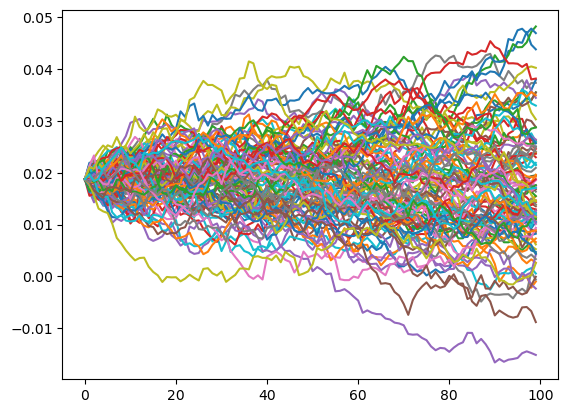

In [13]:
# plt.xlim([0, T])
plt.plot(rates)